In [2]:
import numpy as np
from scipy.optimize import curve_fit

abstaendeOhneKern = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45], dtype=float)
untergrundOhneKern = np.array([0.07, 0.08, 0.09, 0.11, 0.13, 0.17, 0.16, 0.04, -0.11, -0.175, -0.151, -0.032, 0.046, 0.060, 0.045, 0.048, -0.014, 0.103, 0.182, 0.091, 0.045])


milliTeslaOhneKern1Ampere = np.array([16.56, 16.40, 15.08, 12.51, 9.23, 6.21, 4.07, 2.53, 1.57, 0.99, 0.686, 0.452, 0.353, 0.262, 0.186, 0.150, -0.019, 0.131, 0.165, 0.104, 0.054])
milliTeslaOhneKern15Ampere = np.array([24.7, 24.4, 22.4, 18.7, 13.8, 9.29, 6.07, 3.87, 2.44, 1.586, 1.148, 0.698, 0.485, 0.318, 0.187, 0.115, 0.004, 0.138, 0.171, 0.098, 0.045])

abstaendeMitKern = np.array([
    4.3,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    14,
    16,
    18,
    20,
    25,
    30,
    35,
    40,
    45,
    50
])

spulenLaenge = 7.43
sensorLongitudinalLaenge = 4.3
abstaendeMitKern -= sensorLongitudinalLaenge
abstaendeMitKern += spulenLaenge

untergrundMitKern = np.array([
    0.3,
    0.3,
    0.27,
    0.13,
    -0.05,
    -0.11,
    -0.1,
    -0.05,
    -0.02,
    0.025,
    0.01,
    -0.03,
    -0.042,
    -0.046,
    0.09,
    0.145,
    0.089,
    0.042,
    0.038
])


milliTeslaMitKern1Ampere = np.array([
    21.1,
    18.9,
    13.66,
    8.97,
    5.82,
    3.92,
    2.83,
    2.15,
    1.675,
    1.103,
    0.729,
    0.469,
    0.314,
    0.104,
    0.186,
    0.205,
    0.128,
    0.071,
    0.06
])

abstaendeTransversal = np.array([
    6.5,
    7.0,
    8.0,
    9.0,
    10.0,
    11.0,
    12.0,
    14.0,
    16.0,
    18.0,
    20.0,
    25.0,
    30.0,
    35.0,
    40.0,
    45.0
])

transversalAbstandLinealMitte = 5.25
transversalSensorLaenge = 6.5

abstaendeTransversal -= transversalSensorLaenge
abstaendeTransversal += transversalAbstandLinealMitte

transversalUntergrund = np.array([
    -0.19,
    -0.18,
    -0.17,
    -0.17,
    -0.162,
    -0.166,
    -0.167,
    -0.187,
    -0.178,
    -0.169,
    -0.162,
    -0.193,
    -0.188,
    -0.157,
    -0.151,
    -0.141
])


print("Untergrund trans: {}".format(np.mean(transversalUntergrund)))

milliTeslaTransversal1Ampere = np.array([
    3.3,
    2.69,
    1.72,
    1.08,
    0.667,
    0.413,
    0.250,
    0.048,
    -0.036,
    -0.078,
    -0.098,
    -0.158,
    -0.167,
    -0.171,
    -0.144,
    -0.135
])

def mirrorArray(arr, swapSign=False):
    mirrored = np.ndarray((2*len(arr) - 1))
    swapSignFact = 1
    if swapSign:
        swapSignFact = -1

    mirrored[:len(arr)] = swapSignFact * arr[::-1]
    mirrored[len(arr)-1:] = arr
    return mirrored

def milliTeslaUndUntergrundZuBData(milliTesla, untergrund):
    return (milliTesla - untergrund) / 1000.0

transversalTesla1Ampere = milliTeslaUndUntergrundZuBData(milliTeslaTransversal1Ampere, transversalUntergrund)
bDataTransversal1AmpereMirrored = mirrorArray(transversalTesla1Ampere)

mitKernAmpere = milliTeslaUndUntergrundZuBData(milliTeslaMitKern1Ampere, untergrundMitKern)
bDataMitKernMirrored = mirrorArray(mitKernAmpere)


ohneKern1Ampere = milliTeslaUndUntergrundZuBData(milliTeslaOhneKern1Ampere, untergrundOhneKern)
bDataOhneKern1AmpereMirrored = mirrorArray(ohneKern1Ampere)

ohneKern15Ampere = milliTeslaUndUntergrundZuBData(milliTeslaOhneKern15Ampere, untergrundOhneKern)
bDataOhneKern15AmpereMirrored = mirrorArray(ohneKern15Ampere)

abstaendeMitKern /= 100.0
abstaendeTransversal /= 100.0
abstaendeOhneKern /= 100.0

xDataOhneKernMirrored = mirrorArray(abstaendeOhneKern, swapSign=True)
xDataMitKernMirrored = mirrorArray(abstaendeMitKern, swapSign=True)
xDataTransversal = mirrorArray(abstaendeTransversal, swapSign=True)





Untergrund trans: -0.1706875


In [3]:
mu = 1.256637061 * 10.0**(-6.0)
N = 1200

def biotSavartLongitudinal(xData, rParam, iParam):
    return N * (mu / 2.0) * (rParam**2.0) * iParam * (xData**2.0 + rParam**2.0)**(-3.0/2.0)

def fitBiotSavartLongitudinal(xData, bData):
    sigma = np.ones((len(xData))) * 100
    popt, pcov = curve_fit(biotSavartLongitudinal, xdata=xData, ydata=bData, p0 = (0.05, 1), sigma=sigma)

    perr = np.sqrt(np.diag(pcov))

    return {
        "rErr": perr[0],
        "iErr": perr[1],
        "rOpt": popt[0],
        "iOpt": popt[1]
    }


fitResOhneKern1Ampere = fitBiotSavartLongitudinal(xDataOhneKernMirrored, bDataOhneKern1AmpereMirrored)
fitResOhneKern15Ampere = fitBiotSavartLongitudinal(xDataOhneKernMirrored, bDataOhneKern15AmpereMirrored)




    

In [4]:
rEff1Amp = fitResOhneKern1Ampere["rOpt"]
rEff15Amp = fitResOhneKern15Ampere["rOpt"]
iEff1Amp = fitResOhneKern1Ampere["iOpt"]
iEff15Amp = fitResOhneKern15Ampere["iOpt"]

bMax1AmpereOhneKern = np.max(bDataOhneKern1AmpereMirrored)
bMax15AmpereOhneKern = np.max(bDataOhneKern15AmpereMirrored)

def calcXMax(rEff, iEff, bMax):
    return np.sqrt((N * mu * rEff**2.0 * iEff / (2 * bMax))**(2.0/3.0) - rEff**2.0)

def calcXMaxErr(rEff, iEff, bMax, xMax, rErr, iErr):
    fracSqrt = (N * mu * rEff**2.0 * iEff / (2 * bMax))**(2.0/3.0)
    rErrFact = (2 * fracSqrt / (3*rEff) - 1.0 * rEff) * 2.0 / (xMax)
    iErrFact = fracSqrt / (3.0 * iEff * xMax)
    return np.sqrt( (rErrFact * rErr) **2.0 + (iErrFact * iErr)**2.0 )
xMax1Amp = calcXMax(rEff1Amp, iEff1Amp, bMax1AmpereOhneKern)
xMax15Amp = calcXMax(rEff15Amp, iEff15Amp, bMax15AmpereOhneKern)

xMax1AmpErr = calcXMaxErr(rEff1Amp, iEff1Amp, bMax1AmpereOhneKern, xMax1Amp, fitResOhneKern1Ampere["rErr"], fitResOhneKern1Ampere["iErr"])
xMax15AmpErr = calcXMaxErr(rEff15Amp, iEff15Amp, bMax15AmpereOhneKern, xMax15Amp, fitResOhneKern15Ampere["rErr"], fitResOhneKern15Ampere["iErr"])


def getWeightedMeanAndExternalUnsure(values, unsures):
    weights = 1/((unsures**2.0) * np.sum(1/(unsures**2.0)))
    weightedMean = np.dot(values, weights)
    extUnsure = np.sqrt((np.sum(np.dot(weights, (values-weightedMean) * (values -weightedMean))))/(len(values)-1))
    return weightedMean, extUnsure

xMaxGewichtetesMittel, xMaxGewichtetesMittelFehler = getWeightedMeanAndExternalUnsure(np.array([xMax1Amp, xMax15Amp]), np.array([xMax1AmpErr, xMax15AmpErr]))

print("1A:   rmax = ({}+/-{})m\n1.5A:    rmax = ({}+/-{})m\nMittel: ({}+/-{})m".format(xMax1Amp, xMax1AmpErr, xMax15Amp, xMax15AmpErr, xMaxGewichtetesMittel, xMaxGewichtetesMittelFehler))

Berechnetes BMax für 1.5A: 0.030443428126514134
1A:   rmax = (0.011607808863848603+/-0.0035435718205590067)m
1.5A:    rmax = (0.011499663502620942+/-0.003612919469142739)m
Mittel: (0.011554784032251547+/-5.406252677412859e-05)m


Plot ohne Kern.
 1A:    R = (0.04879098352917958+/-0.00130309943215238)m    I = (1.1589519191053195+/-0.023091285833220117)A
1.5A:    R = (0.04909063899510698+/-0.0013043223149780457)m    I = (1.7374141521213344+/-0.03443376776110385)A


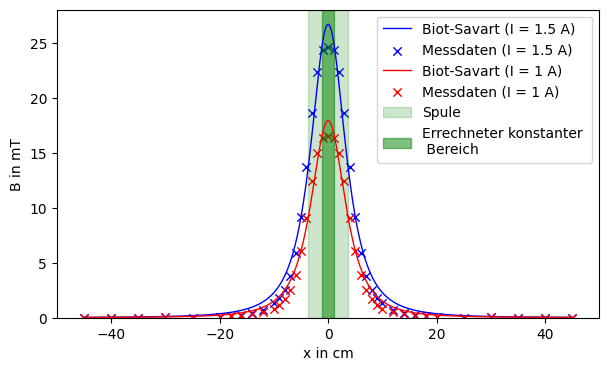

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['scatter.marker'] = "x"
plt.rcParams['font.size'] = 10

def smoothLinSpaceFromXData(xData):
    return np.linspace(np.min(xData), np.max(xData), 500)

linsp = smoothLinSpaceFromXData(xDataOhneKernMirrored)

plt.plot(linsp*100, biotSavartLongitudinal(linsp, fitResOhneKern15Ampere["rOpt"], fitResOhneKern15Ampere["iOpt"]) * 1000, label="Biot-Savart (I = 1.5 A)", c="b")
plt.scatter(xDataOhneKernMirrored*100, bDataOhneKern15AmpereMirrored * 1000, label="Messdaten (I = 1.5 A)", c="b")




plt.plot(linsp*100, biotSavartLongitudinal(linsp, fitResOhneKern1Ampere["rOpt"], fitResOhneKern1Ampere["iOpt"]) * 1000, label="Biot-Savart (I = 1 A)", c="r")
plt.scatter(xDataOhneKernMirrored*100, bDataOhneKern1AmpereMirrored * 1000 , label="Messdaten (I = 1 A)", c="r")

plt.xlim(-50,50)
plt.ylim(0, 28)

plt.axvspan(-spulenLaenge/2, spulenLaenge/2, color="green", alpha=0.2, label="Spule")
plt.axvspan(-xMaxGewichtetesMittel*100, xMaxGewichtetesMittel*100, color="green", alpha=0.5, label="Errechneter konstanter \n Bereich")

plt.xlabel("x in cm")
plt.ylabel("B in mT")





plt.legend()

print("Plot ohne Kern.\n 1A:    R = ({}+/-{})m    I = ({}+/-{})A\n1.5A:    R = ({}+/-{})m    I = ({}+/-{})A".format(fitResOhneKern1Ampere["rOpt"], fitResOhneKern1Ampere["rErr"], 
                                                                                                                    fitResOhneKern1Ampere["iOpt"],  fitResOhneKern1Ampere["iErr"], 
                                                                                                                    fitResOhneKern15Ampere["rOpt"], fitResOhneKern15Ampere["rErr"], 
                                                                                                                    fitResOhneKern15Ampere["iOpt"], fitResOhneKern15Ampere["iErr"]))


Fitted mu:   6.591619017024872+/-0.21123627067701228
BMax mit Kern: 0.10869579759074005
Magnetisierung: 73375.0423669385


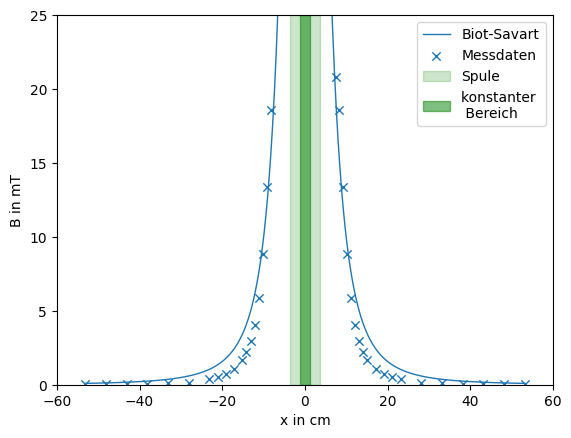

In [30]:
### MIT KERN
rConst = rEff1Amp # gemessen mit 1A
iConst = iEff1Amp
def biotSavartLongitudinalKern(xData, kernParam):
    return kernParam *  N * (mu / 2.0) * (rConst**2.0) * iConst * (xData**2.0 + rConst**2.0)**(-3.0/2.0)

mitKernFitOpt, mitKernFitCov = curve_fit(biotSavartLongitudinalKern, xDataMitKernMirrored, bDataMitKernMirrored)
kernMuFitted = mitKernFitOpt[0]
kernMuFittedErr = np.sqrt(np.diag(mitKernFitCov)) [0]
linsp = smoothLinSpaceFromXData(xDataMitKernMirrored)
plt.plot(100*linsp, 1000*biotSavartLongitudinalKern(linsp, kernMuFitted), label="Biot-Savart")
plt.scatter(100*xDataMitKernMirrored, 1000*bDataMitKernMirrored, label="Messdaten")

plt.axvspan(-spulenLaenge/2, spulenLaenge/2, color="green", alpha=0.2, label="Spule")
plt.axvspan(-xMaxGewichtetesMittel*100, xMaxGewichtetesMittel*100, color="green", alpha=0.5, label="konstanter \n Bereich")

plt.legend()

print("Fitted mu:   {}+/-{}".format(kernMuFitted, kernMuFittedErr))
plt.xlim(-60, 60)
plt.ylim(0, 25)
plt.ylabel("B in mT")
plt.xlabel("x in cm")

bMaxMitKern = biotSavartLongitudinalKern(xMax1Amp, kernMuFitted)

print("BMax mit Kern: {}".format(bMaxMitKern))

magnetisierung = bMaxMitKern * (1.0 - 1.0/kernMuFitted) / mu
print("Magnetisierung: {}".format(magnetisierung))


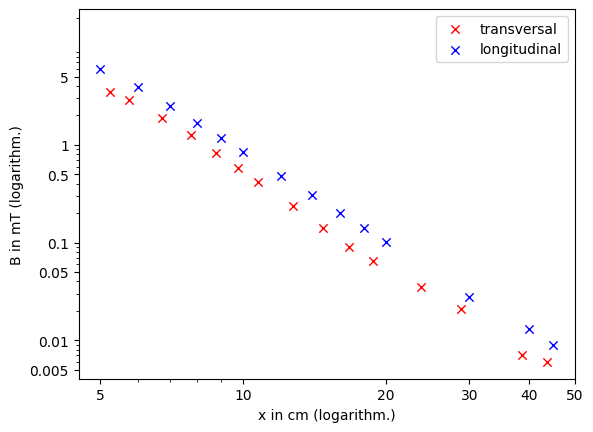

In [62]:
### transversal
fig,ax = plt.subplots()

ax.set_xscale("log")
ax.set_yscale("log")
plt.scatter(xDataTransversal*100, bDataTransversal1AmpereMirrored*1000, color="r", label="transversal")
plt.scatter(xDataOhneKernMirrored*100, bDataOhneKern1AmpereMirrored*1000, color="b", label="longitudinal")
plt.xlabel("x in cm (logarithm.)")
plt.ylabel("B in mT (logarithm.)")

xTicks = (5,10,20,30,40,50)
yTicks = (0.005,0.01, 0.05,0.1, 0.5, 1, 5)
ax.set_xticks(xTicks)
ax.set_xticklabels(xTicks)

ax.set_yticks(yTicks)
ax.set_yticklabels(yTicks)
plt.xlim(4.5,50)
plt.legend()


